# Clustering (การจัดกลุ่ม)

การจัดกลุ่มเป็นการเรียนรู้แบบไม่มีผู้สอน (unsupervised learning) ที่นิยมใช้สำหรับการวิเคราะห์ข้อมูลเชิงสำรวจ (exploratory analysis) เพื่อค้นหารูปแบบแฝงในชุดข้อมูลที่ไม่มีป้ายชื่อ (unlabeled data) 

อัลกอริทึมการจัดกลุ่ม (clustering algorthm) จะจัดจุดข้อมูลที่มีความคล้ายคลึงกันมากไว้ในกลุ่มเดียวกัน เพื่อให้จุดข้อมูลที่อยู่ในกลุ่มเดียวกันมีความเป็นเนื้อเดียวกันสูง (high intra-group homogeneity) และจุดข้อมูลที่อยู่คนละกลุ่มกันมีความต่างกันสูง (high inter-group heterogeneity)

ตัวอย่างการประยุกต์ใช้งาน clustering algorithm เช่น การแบ่งกลุ่มลูกค้า (customer segmentation), การวิเคราะห์ข้อมูล (data analysis), การลดมิติของข้อมูล (dimensionality reduction), การตรวจจับข้อมูลผิดปกติ (outlier detection), การแบ่งส่วนรูปภาพ (image segmentation), การค้นหาข้อมูล (search engine)

ในบทนี้ เราจะศึกษาเทคนิคการจัดกลุ่มข้อมูลที่เรียกว่า Hierachical Cluster Analysis (HCA)

## Hierachical Cluster Analysis (HCA)

Hierarchical Cluster Analysis (HCA) เป็นอัลกอริทึมการจัดกลุ่มข้อมูลที่ทำงานแบบ bottom-up, HCA เหมาะกับกรณีที่ผู้ใช้งานไม่ทราบหรือไม่สามารถประมาณค่าจำนวนคลัสเตอร์ที่ต้องการสร้างได้ 

หลักการทำงานของ HCA คือการผนวกรวมคลัสเตอร์ของจุดข้อมูลที่มีความเหมือนกันเป็นคลัสเตอร์เดียวกัน โดยเริ่มต้นจากคลัสเตอร์ที่ประกอบด้วยจุดข้อมูลเพียงจุดเดียวและดำเนินการรวมตัวคลัสเตอร์ที่เหมือนกันที่สุดเข้าด้วยกัน จนกระทั่งเหลือพียงคลัสเตอร์เดียว 

ความเหมือนหรือความคล้ายคลึงกันระหว่างจุดข้อมูลสามารถวัดค่าเป็นตัวเลขได้โดยใช้ Euclidean distance:
$dist(x, y) = \sqrt{\sum_{i=1}^{n}{(x_i - y_i)^2}}$

จุดข้อมูลที่เหมือนกันจะมีค่า Euclidean distance น้อย ส่วนจุดข้อมูลที่ต่างกันมากจะมีค่า Euclidean distance มาก

จากสูตรคำนวณความคล้ายคลึงกันระหว่างจุดข้อมูลเราสามารถคำนวณความคล้ายคลึงกันของคลัสเตอร์สองคลัสเตอร์ได้ 3 วิธีดังนี้คือ

1. **Single-linkage Clustering** ความคล้ายคลึงระหว่างคลัสเตอร์คำนวณได้จากระยะทางที่ใกล้ที่สุดจากสมาชิกของคลัสเตอร์หนึ่งไปยังสมาชิกของอีกคลัสเตอร์หนึ่ง

2. **Complete-linkage Clustering** ความคล้ายคลึงระหว่างคลัสเตอร์คำนวณได้จากระยะทางที่ไกลที่สุดจากสมาชิกของคลัสเตอร์หนึ่งไปยังสมาชิกของอีกคลัสเตอร์หนึ่ง

3. **Average-linkage Clustering** ความคล้ายคลึงระหว่างคลัสเตอร์คำนวณได้จากค่าเฉลี่ยของระยะทางระหว่างสมาชิกของคลัสเตอร์หนึ่งไปยังสมาชิกของอีกคลัสเตอร์หนึ่ง

กระบวนการทำงานของ HCA แสดงดังในรูปที่ 1 และความสัมพันธ์ระหว่างคลัสเตอร์แต่ละคลัสเตอร์ที่สร้างขึ้นโดย HCA สามารถแสดงได้โดยใช้แผนภูมิต้นไม้ dendrogram ซึ่งมีลักษณะเป็นโครงสร้างเหมือนต้นไม้ ดังแสดงตัวอย่างในรูปที่ 2 

![fig2.jpg](fig2.jpg)
**<center>รูปที่ 1: กระบวนการทำงานของ Hierarchical Clustering Analysis (HCA)</center>**

![fig1.jpg](fig1.jpg)
**<center>รูปที่ 2: Dendrogram ตัวเลขบนแกน x คือ identifier ของจุดข้อมูล ส่วนตัวเลขแกน y คือค่าระดับความลึกของต้นไม้</center>**

### ตัวอย่างการจัดกลุ่มข้อมูลโดยใช้ HCA

กำหนดชุดข้อมูลพันธ์ุสุนัข ดังตารางที่ 1 จงจัดกลุ่มสายพันธ์ุสุนัขโดยใช้อัลกอริทึม HCA

| สายพันธุ์ | ความสูง (นิ้ว) | น้ำหนัก (ปอนด์) |
|--------|--------|--------|
| Border Colle | 20 | 45 |
| Boston Terrier | 16 | 20 |
| Brittany Spaniel | 18 | 35 |
| Bullmastiff | 27 | 120 |
| Chihuahua | 8 | 8 |
| German Shepherd | 25 | 78 |
| Golden Retriever | 23 | 70 |
| Great Dane | 32 | 160 |
| Portuguese Water Dog | 21 | 50|
| Standard Poodle | 19 | 65 |
| Yorkshire Terrier | 6 | 7 |

1. สร้างดาต้าเฟรมเพื่อเก็บข้อมูลสายพันธ์ุสุนัขและแปลงค่าน้ำหนักและความสูงให้อยู่ในช่วงค่ามาตรฐาน 

In [81]:
import pandas as pd

dogs = pd.DataFrame({
            "Breed" : ["Border Colle", "Boston Terrier", "Brittany Spaniel", 
                       "Bullmastiff", "Chihuahua", "German Shepherd", 
                       "Golden Retriever", "Great Dane", "Portuguese Water Dog", 
                       "Standard Poodle", "Yorkshire Terrier"],
            "Height": [20, 16, 18, 27, 8, 25, 23, 32, 21, 19, 6],
            "Weight": [45, 20, 35, 120, 8, 78, 70, 160, 50, 65, 7]
})

dogs.set_index("Breed", inplace=True)

dogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Border Colle to Yorkshire Terrier
Data columns (total 2 columns):
Height    11 non-null int64
Weight    11 non-null int64
dtypes: int64(2)
memory usage: 264.0+ bytes


In [82]:
from sklearn.preprocessing import StandardScaler

dogs_std = StandardScaler().fit_transform(dogs)

from scipy.stats import zscore

dogs_standardized = dogs.apply(zscore)

dogs_standardized

,Height,Weight
Breed,,
Border Colle,0.062238,-0.330507
Boston Terrier,-0.485456,-0.888111
Brittany Spaniel,-0.211609,-0.553549
Bullmastiff,1.020703,1.342305
Chihuahua,-1.580845,-1.155761
German Shepherd,0.746856,0.405530
Golden Retriever,0.473009,0.227097
Great Dane,1.705321,2.234471
Portuguese Water Dog,0.199162,-0.218986


2. จัดกลุ่มโดยใช้ HCA แบบ Complete-linkage clustering

In [76]:
from scipy.cluster.hierarchy import linkage

single_linkage_model = linkage(dogs_standardized, method='single')

3. แสดง dendrogram ของโมเดลที่ได้

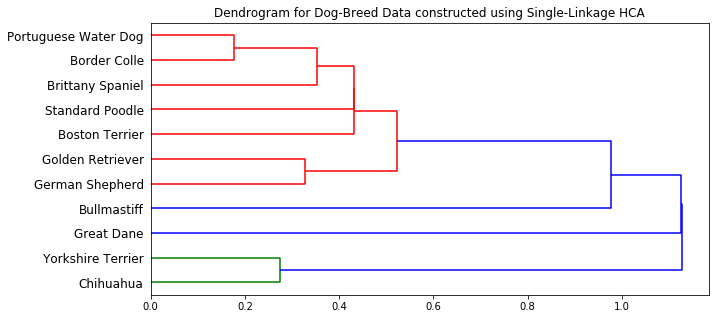

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10,5))

plt.subplot(111)
plt.title("Dendrogram for Dog-Breed Data constructed using Single-Linkage HCA")
dendrogram(single_linkage_model, orientation='right', leaf_font_size=12, 
           labels=dogs_standardized.index)

plt.show()

เพื่อให้เข้าใจกลไกของ Single-linkage HCA และเพื่อตรวจสอบผลลัพธ์การจัดกลุ่มที่ได้จากการใช้เมธอด `scipy.cluster.hierarchy.linkage` ข้างต้น ต่อไปเราจะทดลองสร้าง dendrogram โดยใช้ Single-linkage HCA โดยไม่ใช้ไลบารี่ scipy แต่จะทำการคำนวณหาค่า Euclidean distance และสร้างคลัสเตอร์เองทีละขั้นตอน

ขั้นตอนแรกเราจะคำนวณหาระยะทางระหว่างจุดข้อมูลแต่ละจุด โดยใช้เมธอด `scipy.spatial.distance.euclidean`

In [137]:
from scipy.spatial.distance import euclidean

distances = {}

M = {}

done = []

for breed in dogs_standardized.index:
    M[breed] = {}
    done.append(breed)
    for other_breed in dogs_standardized.index:
        if other_breed in done: continue
        M[breed][other_breed] = euclidean(dogs_standardized.loc[breed], 
                                                     dogs_standardized.loc[other_breed])
        distances[breed+":"+other_breed] = M[breed][other_breed]
        
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(M)

{   'Border Colle': {   'Boston Terrier': 0.7815953388456858,
                        'Brittany Spaniel': 0.35318524151607267,
                        'Bullmastiff': 1.9279407298383904,
                        'Chihuahua': 1.8386857334523803,
                        'German Shepherd': 1.0052126790592273,
                        'Golden Retriever': 0.6925711740962321,
                        'Great Dane': 3.046118213756746,
                        'Portuguese Water Dog': 0.17659262075803636,
                        'Standard Poodle': 0.46662437897083614,
                        'Yorkshire Terrier': 2.0959425529183227},
    'Boston Terrier': {   'Brittany Spaniel': 0.43234739188836974,
                          'Bullmastiff': 2.6913327265580724,
                          'Chihuahua': 1.1276136461940418,
                          'German Shepherd': 1.7866452095543548,
                          'Golden Retriever': 1.4704911242751728,
                          'Great Dane': 3.81444967554747

จากนั้นทำการเรียงลำดับข้อมูลตามระยะทางจากน้อยไปมาก

In [139]:
sorted_distances = sorted(distances.items(), key=lambda kv: (kv[1], kv[0]))
i = 1
for dogs, dist in sorted_distances:
    d1, d2 = dogs.split(':')
    print("{}. {:20} => {:20} : {:.5}".format(i, d1, d2, dist))
    i = i + 1

1. Border Colle         => Portuguese Water Dog : 0.17659
2. Chihuahua            => Yorkshire Terrier    : 0.27475
3. German Shepherd      => Golden Retriever     : 0.32685
4. Border Colle         => Brittany Spaniel     : 0.35319
5. Portuguese Water Dog => Standard Poodle      : 0.43235
6. Boston Terrier       => Brittany Spaniel     : 0.43235
7. Border Colle         => Standard Poodle      : 0.46662
8. Golden Retriever     => Portuguese Water Dog : 0.52343
9. Brittany Spaniel     => Portuguese Water Dog : 0.52978
10. Golden Retriever     => Standard Poodle      : 0.55893
11. Brittany Spaniel     => Standard Poodle      : 0.68299
12. Border Colle         => Golden Retriever     : 0.69257
13. Border Colle         => Boston Terrier       : 0.7816
14. German Shepherd      => Portuguese Water Dog : 0.83066
15. German Shepherd      => Standard Poodle      : 0.87121
16. Boston Terrier       => Portuguese Water Dog : 0.9573
17. Bullmastiff          => German Shepherd      : 0.97598
18. Bord

จากข้อมูลระยะทางที่ได้ เราสามารถสร้างคลัสเตอร์ได้ ดังนี้

1. รวมจุดข้อมูล 'Border Colle' กับ 'Portuguese Water Dog' เป็นคลัสเตอร์ที่ 1 (1. Border Colle  => Portuguese Water Dog : 0.17659)

2. รวมจุดข้อมูล 'Chihuahua' กับ 'Yorkshire Terrier' เป็นคลัสเตอร์ที่ 2 (2. Chihuahua => Yorkshire Terrier : 0.27475)

3. รวมจุดข้อมูล 'German Shepherd' กับ 'Golden Retriever' เป็นคลัสเตอร์ที่ 3 (3. German Shepherd      => Golden Retriever     : 0.32685)

4. รวมจุดข้อมูล 'Brittany Spaniel' กับคลัสเตอร์ที่ 1 ได้เป็นคลัสเตอร์ที่ 4 (4. Border Colle         => Brittany Spaniel     : 0.35319)

5. รวมจุดข้อมูล 'Standard Poodle' กับคลัสเตอร์ที่ 4 ได้เป็นคลัสเตอร์ที่ 5 (5. Portuguese Water Dog => Standard Poodle      : 0.43235)

6. รวมจุดข้อมูล 'Boston Terrier' กับคลัสเตอร์ที่ 5 ได้เป็นคลัสเตอร์ที่ 6 (6. Boston Terrier       => Brittany Spaniel     : 0.43235)

7. รวมคลัสเตอร์ที่ 3 กับคลัสเตอร์ที่ 6 ได้เป็นคลัสเตอร์ที่ 7 (8. Golden Retriever     => Portuguese Water Dog : 0.52343)

8. รวมจุดข้อมูล 'Bullmastiff' กับคลัสเตอร์ที่ 7 ได้เป็นคลัสเตอร์ที่ 8 (17. Bullmastiff          => German Shepherd      : 0.97598)

9. รวมจุดข้อมูล 'Great Dane' กับคลัสเตอร์ที่ 8 ได้เป็นคลัสเตอร์ที่ 9 (21. Bullmastiff          => Great Dane           : 1.1246

10. รวมคลัสเตอร์ที่ 2 กับคลัสเตอร์ที่ 9 ได้เป็นคลัสเตอร์สุดท้ายคือคลัสเตอร์ที่ 10 (22. Boston Terrier       => Chihuahua            : 1.1276)

## แบบฝึกหัด

1. สร้าง scatterplot เพื่อแสดงความสัมพันธ์ระหว่างความสูงและน้ำหนักของจุดข้อมูลแต่ละจุดในชุดข้อมูล Dog Breed กราฟที่ได้มีความสอดคล้องกับ dendrogram ที่ได้จาก HCA หรือไม่อย่างไร

2. จงสร้าง dendrogram ที่ได้จากการทำ `Complete-linkage clustering` และ `Average-linkage clustering` บนชุดข้อมูล Dog Breed